<a id="Haut"></a>
## Commencer a jouer 😈 
1. [Import packages](#Import)
1. [Preprocess functions](#Preprocess)
1. [Setting parameters](#Parameters)
1. [Créer Deep Q-Learning Neural Network](#QLNN)

---

In [130]:
import sys

In [131]:
#sys.executable

In [132]:
#sys.path
#Check Readme.md for detail sys.path.append(/users/....../bin/python3/jwojfoi )

In [133]:
import tensorflow as tf
import numpy as np
from vizdoom import *

import random
import time
from skimage import transform

from collections import deque
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [134]:
# On Créer la env
def creer_env():
    game = DoomGame()
    
    # Lire the setting et Initial
    game.load_config('/Users/johnny_hung/.ja_reinforecement_learning_lab/lib/python3.6/site-packages/vizdoom/scenarios/basic.cfg')
    game.set_doom_scenario_path('/Users/johnny_hung/.ja_reinforecement_learning_lab/lib/python3.6/site-packages/vizdoom/scenarios/basic.wad')
    game.init()
    
    # Les actions
    left  = [1,0,0]
    right = [0,1,0]
    shoot = [0,0,1]
    possible_actions = [left,right,shoot]
    
    return game, possible_actions

def test_env():
    game = DoomGame()
    
    # Lire the setting et Initial
    game.load_config('/Users/johnny_hung/.ja_reinforecement_learning_lab/lib/python3.6/site-packages/vizdoom/scenarios/basic.cfg')
    game.set_doom_scenario_path('/Users/johnny_hung/.ja_reinforecement_learning_lab/lib/python3.6/site-packages/vizdoom/scenarios/basic.wad')
    game.init()
    
    # Les actions
    left  = [1,0,0]
    right = [0,1,0]
    shoot = [0,0,1]
    possible_actions = [left,right,shoot]
    
    episodes = 3
    for i in range(episodes):
        print("Start new episode !!!!!!!!!!!!!!!!!!!!!!!!!!!")
        game.new_episode()
        while not game.is_episode_finished():
            state  = game.get_state()
            img    = state.screen_buffer
            misc   = state.game_variables
            action = random.choice(possible_actions)
            print("action = ",action)
            reward = game.make_action(action)
            print("         reward:", reward)
            time.sleep(0.02)
        print("Result: ",game.get_total_reward())
        time.sleep(2)
    game.close()
    

<a id="Preprocess"></a>
### Créer les preprocessing functions  🔧
- ___preprocess_frame(frame)___
- __stack_frames(stacked_frames,state,is_new_episode)__
---

In [135]:
game, possible_actions = creer_env()

In [136]:
def preprocess_frame(frame):
    # Remove the root (useless information)
    cropped_frame = frame[40:-10,30:-30] #Johnny tune tune tune les parameters
    # Normalize Pixel Values
    normalized_frame = cropped_frame/255.0
    # Resize
    preprocessed_frame = transform.resize(normalized_frame,[84,84])
    return preprocessed_frame

In [137]:
frame_stack_size = 4

# On contrler la size de deque pour 4 tout les temps
stacked_frames = deque( [np.zeros((84,84), dtype=np.int) for i in range(frame_stack_size)], maxlen=4)
def stack_frames(stacked_frames, state, is_new_episode):
    # preprocess frame
    frame = preprocess_frame(state)
    
    if is_new_episode:
        # Re-initial le stacked_frames
        stacked_frames = deque( [np.zeros((84,84), dtype=np.int) for i in range(frame_stack_size)], maxlen=4)
        
        # On fais 4x en premier dans tout le nouvelle episode
        for _ in range(4):
            stacked_frames.append(frame)
        
        # package la frame
        stacked_state = np.stack(stacked_frames, axis=2)
        
    else:
        # Append frame to deque, 
        stacked_frames.append(frame)
        
        # Build the stacked state  (84,84,4)
        stacked_state = np.stack(stacked_frames, axis=2)
    
    return stacked_state, stacked_frames

<a id="Parameters"></a>
### Créer les parameters
---

In [139]:
################################## Model et Training #################################
state_size     = [84,84,4]  #Notre input, c'est 4 stack (Width,Height, Channels)
action_size    = game.get_available_buttons_size()  # Trois possible actions
learning_rate  = 0.0002
total_episodes = 500
max_steps      = 100   #Max steps in one episode
batch_size     = 64

###########################  Exploration , Epsilon #############################
explore_start  = 1.0
explore_step   = 0.01
decay_rate     = 0.0001
gamma          = 0.95    #Qlearning


###############################  Memory     ###############################
pretrain_length = batch_size
memory_size     = 1000000

# True for training, False for watching the agent play
training       = True
# True for Render the env 
episode_render = False

<a id="QLNN"></a>
### Créer Deep Q-Learning Neural Network
---
1. stacked_state     (84,84,  4) 
1. Convolution layer (20,20, 32) > ELU
1. Convolution layer ( 9, 9, 64) > ELU
1. Convolution layer ( 3, 3,128) > ELU
1. Flaterten   layer 
1. FC                (512 units) > ELU
1. FC                (  3 units) Q-Value=(Left,Right,Shoot)


<a id="referenced"></a>
## 99 Referenced 📚
---
1. [TestEnv](#Testenv)
1. [Frame](#Frame)
1. [Stack](#Stack)

<a id="Testenv"></a>
### Running the following code, to check your env is setting ok or not
---

In [129]:
test_env()

Start new episode !!!!!!!!!!!!!!!!!!!!!!!!!!!
action =  [1, 0, 0]
         reward: -1.0
action =  [1, 0, 0]
         reward: -1.0
action =  [0, 1, 0]
         reward: -1.0
action =  [0, 0, 1]
         reward: -1.0
action =  [0, 1, 0]
         reward: -1.0
action =  [0, 1, 0]
         reward: -1.0
action =  [1, 0, 0]
         reward: -1.0
action =  [1, 0, 0]
         reward: -6.0
action =  [1, 0, 0]
         reward: -1.0
action =  [0, 0, 1]
         reward: -1.0
action =  [0, 0, 1]
         reward: -1.0
action =  [0, 0, 1]
         reward: -1.0
action =  [1, 0, 0]
         reward: -1.0
action =  [1, 0, 0]
         reward: -1.0
action =  [0, 1, 0]
         reward: -1.0
action =  [1, 0, 0]
         reward: -1.0
action =  [0, 0, 1]
         reward: -1.0
action =  [0, 1, 0]
         reward: -1.0
action =  [1, 0, 0]
         reward: -1.0
action =  [0, 0, 1]
         reward: -1.0
action =  [1, 0, 0]
         reward: -1.0
action =  [0, 0, 1]
         reward: -1.0
action =  [1, 0, 0]
         r

action =  [1, 0, 0]
         reward: -1.0
action =  [0, 0, 1]
         reward: -1.0
action =  [1, 0, 0]
         reward: -1.0
action =  [1, 0, 0]
         reward: -1.0
action =  [0, 0, 1]
         reward: -1.0
action =  [1, 0, 0]
         reward: -1.0
action =  [0, 1, 0]
         reward: -1.0
action =  [0, 1, 0]
         reward: -1.0
action =  [0, 1, 0]
         reward: -1.0
action =  [0, 1, 0]
         reward: -1.0
action =  [0, 1, 0]
         reward: -1.0
action =  [0, 0, 1]
         reward: -1.0
action =  [0, 0, 1]
         reward: -1.0
action =  [0, 1, 0]
         reward: -1.0
action =  [1, 0, 0]
         reward: -1.0
action =  [0, 1, 0]
         reward: -6.0
action =  [0, 1, 0]
         reward: -1.0
action =  [0, 1, 0]
         reward: -1.0
action =  [1, 0, 0]
         reward: -1.0
action =  [1, 0, 0]
         reward: -1.0
action =  [0, 1, 0]
         reward: -1.0
action =  [1, 0, 0]
         reward: -1.0
action =  [1, 0, 0]
         reward: -1.0
action =  [1, 0, 0]
         rewar

KeyboardInterrupt: 

<a id="Frame"></a> 
### C'est quoi: Frame 🤔
---
C'est important pour comprendre <font color="green"> la frame = le state </font> parceque, AI regard tout le state pour jouer , comme nous, par la écran. 

La ___vizdoom env___ faire créer la frame plus gros(avec toit d'un stage, enemy, etc..). Mais, on n'a besoin pas de "toit" pour traning. Ainsi, on change la size à (84,84). C'est mieux pour nous en training. 

In [79]:
# Obtenir test env.
game_test, possible_actions = creer_env()
state_frame = game_test.get_state().screen_buffer
state_frame

array([[[35, 39, 39, ..., 39, 39, 39],
        [59, 67, 59, ..., 67, 67, 91],
        [79, 79, 79, ..., 79, 91, 91],
        ...,
        [19, 19, 11, ..., 47, 47, 55],
        [19, 27, 19, ..., 47, 47, 47],
        [11, 19, 19, ..., 27, 19, 19]],

       [[35, 39, 39, ..., 39, 39, 39],
        [59, 67, 59, ..., 67, 67, 91],
        [79, 79, 79, ..., 79, 91, 91],
        ...,
        [19, 19, 11, ..., 47, 47, 55],
        [19, 27, 19, ..., 47, 47, 47],
        [11, 19, 19, ..., 27, 19, 19]],

       [[35, 39, 39, ..., 39, 39, 39],
        [59, 67, 59, ..., 67, 67, 91],
        [79, 79, 79, ..., 79, 91, 91],
        ...,
        [19, 19, 11, ..., 47, 47, 55],
        [19, 27, 19, ..., 47, 47, 47],
        [11, 19, 19, ..., 27, 19, 19]]], dtype=uint8)

In [80]:
state_frame.shape

(3, 240, 320)

In [81]:
normalized_frame = state_frame / 255.0
normalized_frame

array([[[0.1372549 , 0.15294118, 0.15294118, ..., 0.15294118,
         0.15294118, 0.15294118],
        [0.23137255, 0.2627451 , 0.23137255, ..., 0.2627451 ,
         0.2627451 , 0.35686275],
        [0.30980392, 0.30980392, 0.30980392, ..., 0.30980392,
         0.35686275, 0.35686275],
        ...,
        [0.0745098 , 0.0745098 , 0.04313725, ..., 0.18431373,
         0.18431373, 0.21568627],
        [0.0745098 , 0.10588235, 0.0745098 , ..., 0.18431373,
         0.18431373, 0.18431373],
        [0.04313725, 0.0745098 , 0.0745098 , ..., 0.10588235,
         0.0745098 , 0.0745098 ]],

       [[0.1372549 , 0.15294118, 0.15294118, ..., 0.15294118,
         0.15294118, 0.15294118],
        [0.23137255, 0.2627451 , 0.23137255, ..., 0.2627451 ,
         0.2627451 , 0.35686275],
        [0.30980392, 0.30980392, 0.30980392, ..., 0.30980392,
         0.35686275, 0.35686275],
        ...,
        [0.0745098 , 0.0745098 , 0.04313725, ..., 0.18431373,
         0.18431373, 0.21568627],
        [0.0

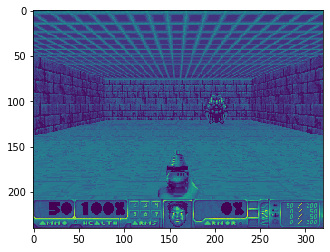

In [83]:
# Affichier one by one: [0] ou [1] ou [2] 
plt.imshow(normalized_frame[2])
plt.show()

Lib referenced: [np.mean](http://lagrange.univ-lyon1.fr/docs/numpy/1.11.0/reference/generated/numpy.mean.html) 🐣

In [85]:
# Réduire la couvrir à une piece selument
reduced_frame = np.mean(normalized_frame,axis=0)
reduced_frame.shape #(240, 320)

(240, 320)

In [86]:
reduced_frame

array([[0.1372549 , 0.15294118, 0.15294118, ..., 0.15294118, 0.15294118,
        0.15294118],
       [0.23137255, 0.2627451 , 0.23137255, ..., 0.2627451 , 0.2627451 ,
        0.35686275],
       [0.30980392, 0.30980392, 0.30980392, ..., 0.30980392, 0.35686275,
        0.35686275],
       ...,
       [0.0745098 , 0.0745098 , 0.04313725, ..., 0.18431373, 0.18431373,
        0.21568627],
       [0.0745098 , 0.10588235, 0.0745098 , ..., 0.18431373, 0.18431373,
        0.18431373],
       [0.04313725, 0.0745098 , 0.0745098 , ..., 0.10588235, 0.0745098 ,
        0.0745098 ]])

In [92]:
# Réduire la toit
# C'est important:  [ y-direction, x-direction ]
cut_frame = reduced_frame[40:-10,30:-30]
cut_frame.shape  #(200,260)

(190, 260)

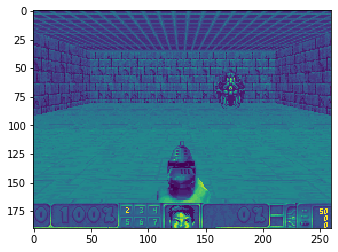

In [93]:
plt.imshow(cut_frame)
plt.show()

<a id="Stack"></a>
### Explique pour le np.stack(stacked_frames, axis=2)
1. deque method: C'est FIFO (First in , First out)
1. On fixed le maxlen = 4, continuer changer la frame 
---

In [115]:
input_stack_size = 4
stacked_frames = deque([np.zeros((84,84),dtype=np.int) for i in range(input_stack_size)], maxlen=4)
stacked_frames

deque([array([[0, 0, 0, ..., 0, 0, 0],
              [0, 0, 0, ..., 0, 0, 0],
              [0, 0, 0, ..., 0, 0, 0],
              ...,
              [0, 0, 0, ..., 0, 0, 0],
              [0, 0, 0, ..., 0, 0, 0],
              [0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0],
              [0, 0, 0, ..., 0, 0, 0],
              [0, 0, 0, ..., 0, 0, 0],
              ...,
              [0, 0, 0, ..., 0, 0, 0],
              [0, 0, 0, ..., 0, 0, 0],
              [0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0],
              [0, 0, 0, ..., 0, 0, 0],
              [0, 0, 0, ..., 0, 0, 0],
              ...,
              [0, 0, 0, ..., 0, 0, 0],
              [0, 0, 0, ..., 0, 0, 0],
              [0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0],
              [0, 0, 0, ..., 0, 0, 0],
              [0, 0, 0, ..., 0, 0, 0],
              ...,
              [0, 0, 0, ..., 0, 0, 0],
              [0, 0, 0, ..., 0, 0, 0],
              [0, 0, 0, ..., 0, 0, 0]])])

In [116]:
adjouter_frame = np.zeros((84,84),dtype=np.int)
adjouter_frame = adjouter_frame + 2
adjouter_frame

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]])

In [122]:
# By running , this multi time, you can see the changes from the deque-stack 
stacked_frames.append(adjouter_frame)
stacked_frames

deque([array([[2, 2, 2, ..., 2, 2, 2],
              [2, 2, 2, ..., 2, 2, 2],
              [2, 2, 2, ..., 2, 2, 2],
              ...,
              [2, 2, 2, ..., 2, 2, 2],
              [2, 2, 2, ..., 2, 2, 2],
              [2, 2, 2, ..., 2, 2, 2]]), array([[2, 2, 2, ..., 2, 2, 2],
              [2, 2, 2, ..., 2, 2, 2],
              [2, 2, 2, ..., 2, 2, 2],
              ...,
              [2, 2, 2, ..., 2, 2, 2],
              [2, 2, 2, ..., 2, 2, 2],
              [2, 2, 2, ..., 2, 2, 2]]), array([[2, 2, 2, ..., 2, 2, 2],
              [2, 2, 2, ..., 2, 2, 2],
              [2, 2, 2, ..., 2, 2, 2],
              ...,
              [2, 2, 2, ..., 2, 2, 2],
              [2, 2, 2, ..., 2, 2, 2],
              [2, 2, 2, ..., 2, 2, 2]]), array([[2, 2, 2, ..., 2, 2, 2],
              [2, 2, 2, ..., 2, 2, 2],
              [2, 2, 2, ..., 2, 2, 2],
              ...,
              [2, 2, 2, ..., 2, 2, 2],
              [2, 2, 2, ..., 2, 2, 2],
              [2, 2, 2, ..., 2, 2, 2]])])

In [124]:
# Stacked the states par np.stack method
# On metter la 4 index dans la axis=2
# Note: axis=0, c'est y-direction 
# .     axis=1, c'est x-direction 
stacked_state = np.stack(stacked_frames,axis=2)  
stacked_state.shape  #(y-direction, x-direction, stacked_frame_index)

(84, 84, 4)

[Back](#Haut)